In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from skbio.diversity import beta_diversity
import scipy.spatial
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

#import all data and metadata
data =  pd.read_csv('/Users/ellawiegman/ISB cmwg/microbiome/data/sush_data.csv',index_col=0, header=0, sep=',')
meta = pd.read_csv('/Users/ellawiegman/micro_meta2.csv',index_col=0, header=0, sep=',')

data2 =  pd.read_csv('/Users/ellawiegman/ISB cmwg/microbiome/data/sush_data.csv',index_col=0, header=0, sep=',')
meta2 = pd.read_csv('/Users/ellawiegman/micro_meta2.csv',index_col=0, header=0, sep=',')

data3 =  pd.read_csv('/Users/ellawiegman/ISB cmwg/microbiome/data/sush_data.csv',index_col=0, header=0, sep=',')
meta3 = pd.read_csv('/Users/ellawiegman/micro_meta2.csv',index_col=0, header=0, sep=',')

data4 =  pd.read_csv('/Users/ellawiegman/ISB cmwg/microbiome/data/sush_data.csv',index_col=0, header=0, sep=',')
meta4 = pd.read_csv('/Users/ellawiegman/micro_meta2.csv',index_col=0, header=0, sep=',')


#remove rows with unspecified metadata in metadata
meta = meta[(meta.Label == 1) | (meta.Label == 2) | (meta.Label == 4) | (meta.Label == 5) | (meta.Label == 6) | (meta.Label == 8)]

#define meta2 as only vaginal rows
meta2 = meta2[(meta2.Label == 1) | (meta2.Label == 2) | (meta2.Label == 3) | (meta2.Label == 4)]

#define meta3 as only cesarean rows
meta3 = meta3[(meta3.Label == 5) | (meta3.Label == 6) | (meta3.Label == 7) | (meta3.Label == 8)]

#define meta4 as only breastfed rows
meta4 = meta4[(meta4.Label == 1) | (meta4.Label == 5)]


#remove rows with unspecified metadata in data
data = data[(data.Label == 1) | (data.Label == 2) | (data.Label == 4) | (data.Label == 5) | (data.Label == 6) | (data.Label == 8)]
data = data.drop(['Label'] , axis=1)

#define data2 as only vaginal rows
data2 = data2[(data2.Label == 1) | (data2.Label == 2) | (data2.Label == 3) | (data2.Label == 4)]
data2 = data2.drop(['Label'] , axis=1)

#define data3 as only cesarean rows
data3 = data3[(data3.Label == 5) | (data3.Label == 6) | (data3.Label == 7) | (data3.Label == 8)]
data3 = data3.drop(['Label'] , axis=1)

#define data4 as only breastfed rows
data4 = data4[(data4.Label == 1) | (data4.Label == 5)]
data4 = data4.drop(['Label'] , axis=1)

In [2]:
#seperate data into chunks of 1158 rows (make square matrices)
data_chunk1 = data.iloc[0:1158]
data_chunk2 = data.iloc[1159:2317]
data_chunk3 = data.iloc[2318:3476]

#seperate vaginal data into chunks of 1158 rows
data2_chunk1 = data2.iloc[0:1158]
data2_chunk2 = data2.iloc[1159:2317]
data2_chunk3 = data2.iloc[2318:3476]

#seperate cesarean data into chunks of 1158 rows
data3_chunk1 = data3.iloc[0:1158]

#seperate breastfed data into chunks of 1158 rows
data4_chunk1 = data4.iloc[0:1158]

In [3]:
#make combined metadata
meta_inclusive = meta.iloc[0:3474]

#make combined vaginal metadata
meta2_inclusive = meta2.iloc[0:3474]

#make combined cesarean metadata
meta3_inclusive = meta3.iloc[0:1158]

#make combined breastfed metadata
meta4_inclusive = meta4.iloc[0:1158]

In [4]:
#absolute value of all data chunks
data_1 = abs(data_chunk1.values)
data_2 = abs(data_chunk2.values)
data_3 = abs(data_chunk3.values)

#absolute value of vaginal data chunks
data2_1 = abs(data2_chunk1.values)
data2_2 = abs(data2_chunk2.values)
data2_3 = abs(data2_chunk3.values)

#absolute value of cesarean data chunks
data3_1 = abs(data3_chunk1.values)

#absolute value of breastfed data chunks
data4_1 = abs(data4_chunk1.values)

In [5]:
#define ids as all data labels
ids_1 = data_chunk1.index
ids_2 = data_chunk2.index
ids_3 = data_chunk3.index

#define ids2 as vaginal data labels
ids2_1 = data2_chunk1.index
ids2_2 = data2_chunk2.index
ids2_3 = data2_chunk3.index

#define ids3 as cesarean data labels
ids3_1 = data3_chunk1.index

#define ids4 as breastfed data labels
ids4_1 = data4_chunk1.index

In [6]:
#run bray-curtis for all data
bc_dm_1 = beta_diversity("braycurtis", data_1, ids_1)
bc_dm_2 = beta_diversity("braycurtis", data_2, ids_2)
bc_dm_3 = beta_diversity("braycurtis", data_3, ids_3)

#run bray-curtis for vaginal data
bc_dm_21 = beta_diversity("braycurtis", data2_1, ids2_1)
bc_dm_22 = beta_diversity("braycurtis", data2_2, ids2_2)
bc_dm_23 = beta_diversity("braycurtis", data2_3, ids2_3)

#run bray-curtis for cesarean data
bc_dm_31 = beta_diversity("braycurtis", data3_1, ids3_1)

#run bray-curtis for breastfed data
bc_dm_41 = beta_diversity("braycurtis", data4_1, ids4_1)

In [ ]:
#run pcoa for all data
bc_pc1 = pcoa(np.nan_to_num(bc_dm_1)).samples
bc_pc2 = pcoa(np.nan_to_num(bc_dm_2)).samples
bc_pc3 = pcoa(np.nan_to_num(bc_dm_3)).samples

#run pcoa for vaginal data
bc_pc21 = pcoa(np.nan_to_num(bc_dm_21)).samples
bc_pc22 = pcoa(np.nan_to_num(bc_dm_22)).samples
bc_pc23 = pcoa(np.nan_to_num(bc_dm_23)).samples

#run pcoa for cesarean data
bc_pc31 = pcoa(np.nan_to_num(bc_dm_31)).samples

#run pcoa for breastfed data
bc_pc41 = pcoa(np.nan_to_num(bc_dm_41)).samples

In [381]:
#combine all chunks
frames = [bc_pc1, bc_pc2,bc_pc3]
result = pd.concat(frames)

#combine all vaginal chunks
frames2 = [bc_pc21, bc_pc22,bc_pc23]
result2 = pd.concat(frames2)

#combine all cesarean chunks
frames3 = [bc_pc31]
result3 = pd.concat(frames3)

#combine all breastfed chunks
frames4 = [bc_pc41]
result4 = pd.concat(frames3)

In [382]:
#isolate all desired metadata
meta_idx = meta_inclusive['Label'].values

#isolate desired vaginal metadata
meta_idx2 = meta2_inclusive['Label'].values

#isolate desired cesarean metadata
meta_idx3 = meta3_inclusive['Label'].values

#isolate desired breastfed metadata
meta_idx4 = meta4_inclusive['Label'].values

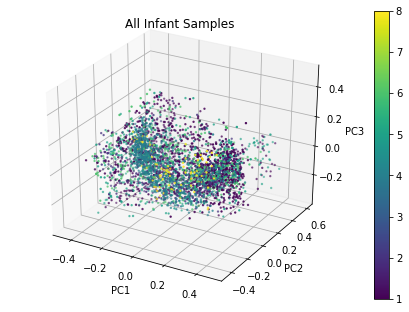

In [394]:
#plot for all slices
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter3D(result.PC1, result.PC2, result.PC3, c=meta_idx, s=2)
plt.title('All Infant Samples')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(p)

plt.show()

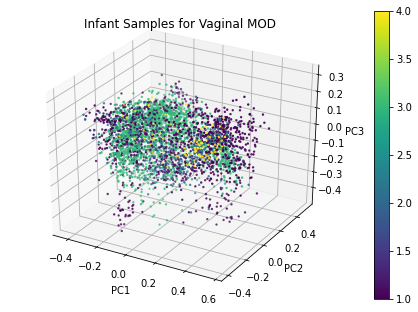

In [384]:
#plot for vaginal slices
fig2 = plt.figure()
ax2 = Axes3D(fig2)
p2 = ax2.scatter3D(result2.PC1, result2.PC2, result2.PC3, c=meta_idx2, s=2)
plt.title('Infant Samples for Vaginal MOD')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
fig2.colorbar(p2)

plt.show()

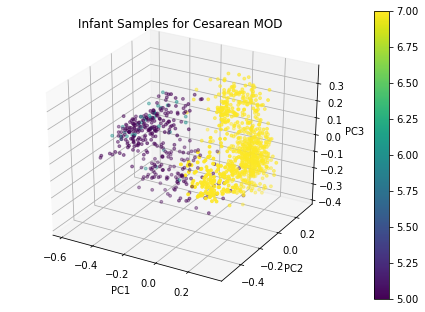

In [385]:
#plot for cesarean slices
fig3 = plt.figure()
ax3 = Axes3D(fig3)
p3 = ax3.scatter3D(result3.PC1, result3.PC2, result3.PC3, c=meta_idx3, s=8)
plt.title('Infant Samples for Cesarean MOD')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')
fig3.colorbar(p3)

plt.show()

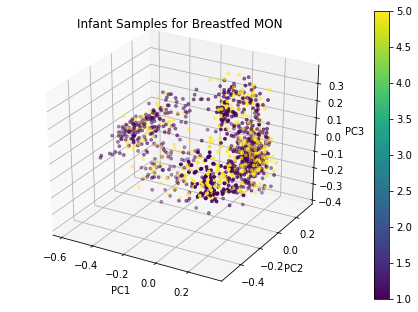

In [386]:
#plot for breastfed slices
fig4 = plt.figure()
ax4 = Axes3D(fig4)
p4 = ax4.scatter3D(result4.PC1, result4.PC2, result4.PC3, c=meta_idx4, s=8)
plt.title('Infant Samples for Breastfed MON')
ax4.set_xlabel('PC1')
ax4.set_ylabel('PC2')
ax4.set_zlabel('PC3')
fig4.colorbar(p4)

plt.show()